In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import *
from scipy import stats
from scipy.stats.kde import gaussian_kde
import random

## ヒストグラム密度推定法

/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
/Users/satsuki/anaconda3/envs/gpu-env/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


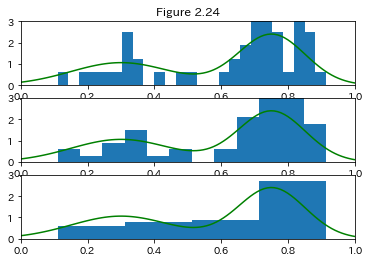

In [15]:
def mix_G(x):
    return (0.4 * G1 + 0.6 * G2)

def mix_G_distribution(n):
  
    ratio = 0.3
    
    if random.random() <ratio:
        return random.gauss(M1, S1)
    else:
        return random.gauss(M2, S2)

def main():
    x = np.linspace(0, 1, 100)

    # 平均値と分散を設定
    M1 = 0.3
    S1 = 0.15
    # 正規分布の確率密度分布から値を取得
    G1 = stats.norm.pdf(x, M1, S1)

    # Set normal distribution1 
    M2 = 0.75
    S2 = 0.1
    G2 = stats.norm.pdf(x, M2, S2)

    N = 50
    Data = [mix_G_distribution(n) for n in range(N)]


    plt.subplot(3, 1, 1)
    plt.hist(Data, bins=25, normed=True)
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    title("Figure 2.24")

    plt.subplot(3, 1, 2)
    plt.hist(Data, bins=round(1/0.08), normed=True)
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

    plt.subplot(3, 1, 3)
    plt.hist(Data, bins=round(1/0.25), normed=True)
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

main()

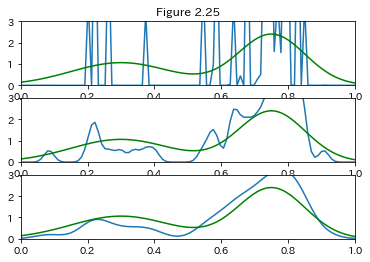

In [16]:
def mix_G(x):
    return (0.4 * G1 + 0.6 * G2)

def main():
    x = np.linspace(0, 1, 100)

    # 平均値と分散を設定
    M1 = 0.3
    S1 = 0.15
    # 正規分布の確率密度分布から値を取得
    G1 = stats.norm.pdf(x, M1, S1)

    # Set normal distribution1 
    M2 = 0.75
    S2 = 0.1
    G2 = stats.norm.pdf(x, M2, S2)
    
    plt.subplot(3, 1, 1)
    plt.plot(x, gaussian_kde(Data, 0.005)(x))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    title("Figure 2.25")

    plt.subplot(3, 1, 2)
    plt.plot(x, gaussian_kde(Data, 0.07)(x))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)

    plt.subplot(3, 1, 3)
    plt.plot(x, gaussian_kde(Data, 0.2)(x))
    plt.plot(x, mix_G(x), "g-")
    plt.xlim(0, 1)
    plt.ylim(0, 3)
    
main()

## K近傍法

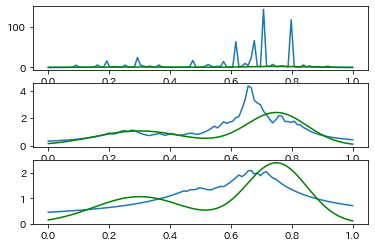

In [17]:
def k_NN(test, train, k):
    train = np. array(train)
    train.sort()
    r = []
    
    # テストデータの各点ごとに最も近い訓練データのクラスを求める
    for idx in test:
        distance = abs(train - idx)
        distance.sort()
        r.append(distance[(k-1)])
    r = np.array(r)
    
    return k / (2* r* N)

def main():
    x = np.linspace(0, 1, 100)
    
    m1 = 0.3
    s1 = 0.15
    G1 = stats.norm.pdf(x, m1, s1)
    
    m2 = 0.75
    s2 = 0.1
    G2 = stats.norm.pdf(x, m2, s2)
    
    N = 50
    
    Data = [mix_G_distribution(n) for n in range(N)]
    
    plt.subplot(3, 1, 1)
    plt.plot(x, k_NN(x ,Data, 1))
    plt.plot(x, mix_G(x), 'g-')
    
    plt.subplot(3, 1, 2)
    plt.plot(x, k_NN(x ,Data, 10))
    plt.plot(x, mix_G(x), 'g-')
    
    plt.subplot(3, 1, 3)
    plt.plot(x, k_NN(x ,Data, 30))
    plt.plot(x, mix_G(x), 'g-')
    
    plt.show()
    
main()

## 確率分布の実装

## ベルヌーイ分布

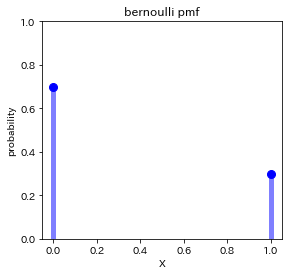

In [23]:
from scipy.stats import bernoulli

# 1をとる確率
mu = 0.3

x = [0, 1]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x , bernoulli.pmf(x, mu), 'bo', ms=8)
ax.vlines(x, 0, bernoulli.pmf(x, mu), colors='b', lw=5, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('probability')
ax.set_title('bernoulli pmf')
ax.set_ylim((0,1))
ax.set_aspect('equal')

plt.show()

## 二項分布

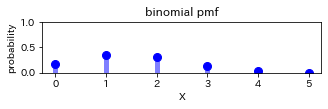

In [29]:
from scipy.stats import binom

mu = 0.3

# 試行回数
N = 5

k = np.arange(N+1)

fig = plt.figure(figsize=(5,8))
ax = fig.add_subplot(111)
ax.plot(k , binom.pmf(k, N, mu), 'bo', ms=8)
ax.vlines(k, 0, binom.pmf(k, N, mu), colors='b', lw=5, alpha=0.5)

ax.set_xlabel('X')
ax.set_ylabel('probability')
ax.set_title('binomial pmf')
ax.set_ylim((0,1))
ax.set_aspect('equal')

plt.show()

## ポアソン分布

Text(0.5, 1.0, 'poisson pmf')

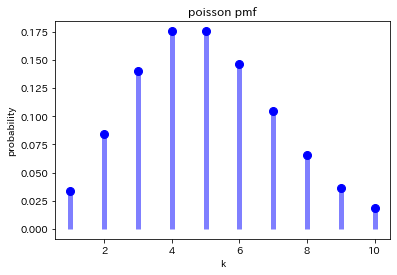

In [32]:
from scipy.stats import poisson

mu = 5

k = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))

fig, ax = plt.subplots(1,1)
ax.plot(k, poisson.pmf(k, mu), 'bo', ms=8)
ax.vlines(k, 0, poisson.pmf(k, mu), colors='b', lw=5, alpha=0.5)
ax.set_xlabel('k')
ax.set_ylabel('probability')
ax.set_title('poisson pmf')


## 指数分布

Text(0.5, 1.0, 'exponential pdf')

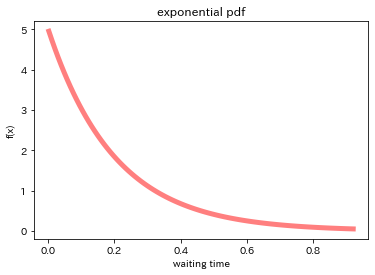

In [33]:
from scipy.stats import expon

mu = 5

k = np.linspace(expon.ppf(0.01, loc=0, scale=1/mu), expon.ppf(0.99, loc=0, scale=1/mu), 100)

fig, ax = plt.subplots(1,1)
ax.plot(k, expon.pdf(k, loc=0, scale=1/mu), 'r-', lw=5, alpha=0.5)
ax.set_xlabel('waiting time')
ax.set_ylabel('f(x)')
ax.set_title('exponential pdf')

## 一様分布

Text(0.5, 1.0, 'uniform pdf')

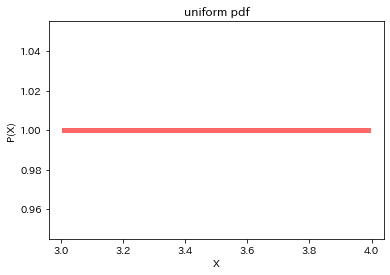

In [35]:
from scipy.stats import uniform

a = 3
b = 4 - a
x = np.linspace(uniform.ppf(0.01, loc=a, scale=b), uniform.ppf(0.99, loc=a, scale=b), 100)

fig, ax = plt.subplots(1,1)
ax.plot(x, uniform.pdf(x, loc=a, scale=b), 'r-', alpha=0.6, lw=5)
ax.set_xlabel('X')
ax.set_ylabel('P(X)')
ax.set_title('uniform pdf')

## ガンマ分布

Text(0.5, 1.0, 'gamma pdf')

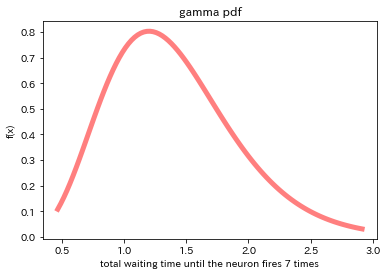

In [37]:
from scipy.stats import gamma

# total number of events
n = 7

# rate parameter
mu = 5

# possible waiting time
x = np.linspace(gamma.ppf(0.01, n, loc=0, scale=1/mu), gamma.ppf(0.99, n, loc=0, scale=1/mu), 100)

# visualize
fig, ax = plt.subplots(1,1)
ax.plot(x, gamma.pdf(x, n, loc=0, scale=1/mu), 'r-', lw=5, alpha=0.5)
ax.set_xlabel('total waiting time until the neuron fires 7 times')
ax.set_ylabel('f(x)')
ax.set_title('gamma pdf')


## ベータ分布

Text(0.5, 1.0, 'beta pdf')

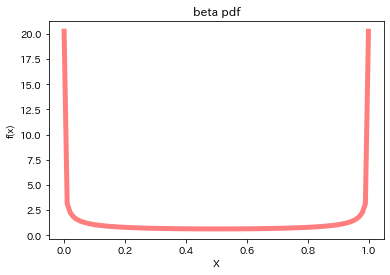

In [38]:
from scipy.stats import beta

# parameters
a = 0.5
b = 0.5

# range
x = np.linspace(beta.ppf(0.01, a, b), beta.ppf(0.99, a, b), 100)

# visualize
fig, ax = plt.subplots(1,1)
ax.plot(x, beta.pdf(x, a, b), 'r-', lw=5, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('f(x)')
ax.set_title('beta pdf')

## 正規分布

Text(0.5, 1.0, 'normal pdf')

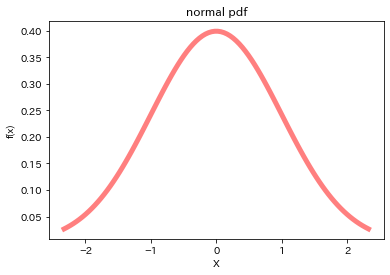

In [39]:
from scipy.stats import norm

# mean
mu = 0

# standard deviation
sd = 1

# range
x = np.linspace(norm.ppf(0.01, loc=mu, scale=sd), norm.ppf(0.99, loc=mu, scale=sd), 100)

# visualize
fig, ax = plt.subplots(1,1)
ax.plot(x, norm.pdf(x, loc=mu, scale=sd), 'r-', lw=5, alpha=0.5)
ax.set_xlabel('X')
ax.set_ylabel('f(x)')
ax.set_title('normal pdf')

## t分布

Text(0.5, 1.0, 't pdf')

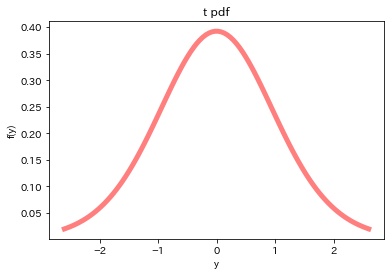

In [40]:
from scipy.stats import t

# degree of freedom
df = 15

# range
x = np.linspace(t.ppf(0.01, df), t.ppf(0.99, df), 100)

# visualize
fig, ax = plt.subplots(1,1)
ax.plot(x, t.pdf(x, df), 'r-', lw=5, alpha=0.5)
ax.set_xlabel('y')
ax.set_ylabel('f(y)')
ax.set_title('t pdf')